<span style="font-size:2em;"> Homogeneous Devices </span>

<span style="font-size:1.5em;">The following codes demonstate an example QCloudSim with hetrogeneous quantum devices micmicing some of the IBM quantum devices. The setup includes a broker, a job generator and a QCloud. A broker is responsible for assigning the incoming jobs to resources with random assignment scheduling algorithm and rotational scheduling algorithm. The runtime of the simulation is limited by the number of incoming jobs. </span>


In [1]:
import socket
import simpy
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from QJob import QJob
from QCloud import QCloud
from Broker import Broker
from JobLogger import JobLogger
from helperfun import *
from helperfun import INTERVAL
from datetime import datetime

In [2]:
def setup(env, num_machines, joblogger, JOB_LIMIT, PrintLog):
    """Setup initializes a quantum cloud, a broker and job generator generating 
    jobs in approx. every INTERVAL minutes."""
    
    # initialize a quantum cloud
    qcloud = QCloud(env, num_machines)
    
    # initialize a broker
    # set prioritize = True for priority scheduling
    # False for FIFO scheduling
    
    broker = Broker(env = env, prioritize = False)
    
    # Create jobs while the simulation is running
    i = 0
    while i < JOB_LIMIT:
        yield env.timeout(incoming_job_interval())
        i += 1
        qjob = QJob(env, i)
        env.process(broker.schedule(qcloud, qjob, joblogger, PrintLog))   
    

In [4]:
machine_name = socket.gethostname()
PrintLog = False # Detail Logs
NUM_OF_MACHINE = 5
JOB_LIMIT = 500
MESSAGE = ''
# Preparing data structures for simulation results

data = {key: [] for key in range(1, NUM_OF_MACHINE+1)}
sim_time_taken = {key: [] for key in range(1, NUM_OF_MACHINE+1)}

# Setup and start the simulation

print(f'Machine Name: {machine_name}')
print(f'Number of fixed jobs: {JOB_LIMIT}')
print(f'Simulation Started at {datetime.now()}')
MESSAGE += f'Machine Name: {machine_name}'
MESSAGE += f'Number of fixed jobs: {JOB_LIMIT}\n'
MESSAGE += f'Simulation Started at {datetime.now()}\n'

sim_start_time = time.time()
for j in range(10): 
    for NUM_MAC in range(1, NUM_OF_MACHINE+1): 
        RANDOM_SEED = random.randint(2, 10000)
        random.seed(RANDOM_SEED)  # This helps to reproduce the results

        joblogger = JobLogger()

        # Create an environment and start the setup process
        env = simpy.Environment()
        env.process(setup(env, NUM_MAC, joblogger, JOB_LIMIT, PrintLog))

        # Execute!
        env.run()
        data[NUM_MAC].append(joblogger.wait_time)
        sim_time_taken[NUM_MAC].append(np.round(env.now, 2))

print(f'Simulation Ended at {datetime.now()}')
MESSAGE += f'Simulation Ended at {datetime.now()}\n'

sim_end_time = time.time()
print(f'Elasped time - {sim_end_time-sim_start_time:.5f} seconds ')
MESSAGE += f'Elasped time - {sim_end_time-sim_start_time:.5f} seconds \n'

avg_sim_time_taken = []
std_sim_time_taken = []

for k in sim_time_taken.keys(): 
    avg_sim_time_taken.append(np.round(np.average(sim_time_taken[k]), 2))
    std_sim_time_taken.append(np.round(np.std(sim_time_taken[k]), 2))
    
print(f'sim time taken: {sim_time_taken}')
print(f'average time taken: {avg_sim_time_taken}')
print(f'standard deviation: {std_sim_time_taken}')
print('Simulation completed ===>')

MESSAGE += f'sim time taken: {sim_time_taken}\n'
MESSAGE += f'average time taken: {avg_sim_time_taken}\n'
MESSAGE += f'standard deviation: {std_sim_time_taken}\n'
MESSAGE += 'Simulation completed ===>\n\n'

filename = 'fixed_jobs_sim_data.txt'
with open(filename, 'a') as file:
    file.write(MESSAGE)

Machine Name: WolfsMacStudio.lan
Number of fixed jobs: 500
Simulation Started at 2024-03-31 14:10:15.600141
Simulation Ended at 2024-03-31 14:10:16.251772
Elasped time - 0.65162
sim time taken: {1: [35153.11, 36412.95, 35919.75, 32897.03, 34891.33, 35301.74, 36465.34, 35484.89, 40662.32, 37514.15], 2: [20131.62, 22363.96, 22755.29, 20890.06, 20482.79, 20859.72, 20835.27, 20536.05, 20688.72, 22770.5], 3: [15987.18, 13534.7, 13688.94, 14956.96, 13317.05, 17300.77, 14660.0, 13505.99, 15075.27, 15281.59], 4: [12225.08, 10973.74, 10216.01, 10840.89, 10675.75, 10060.87, 10530.55, 10403.27, 11126.99, 10516.58], 5: [8791.46, 10063.01, 9900.22, 7941.44, 8375.76, 8387.87, 10190.28, 8126.02, 8164.94, 9289.28]}
average time taken: [36070.26, 21231.4, 14730.84, 10756.97, 8923.03]
standard deviation: [1915.77, 945.16, 1211.46, 580.02, 822.87]
Simulation completed ===>


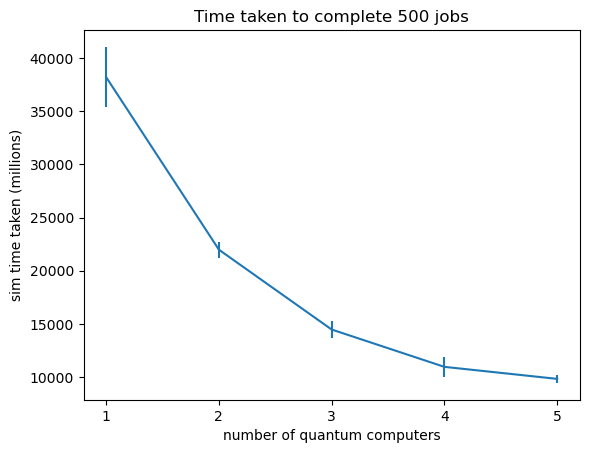

In [5]:
plt.errorbar(list(sim_time_taken.keys()), avg_sim_time_taken, std_sim_time_taken)
plt.xticks(range(1,6))
plt.xlabel('number of quantum computers')
plt.ylabel('sim time taken (millions)')
plt.title('Time taken to complete 500 jobs')
plt.show()

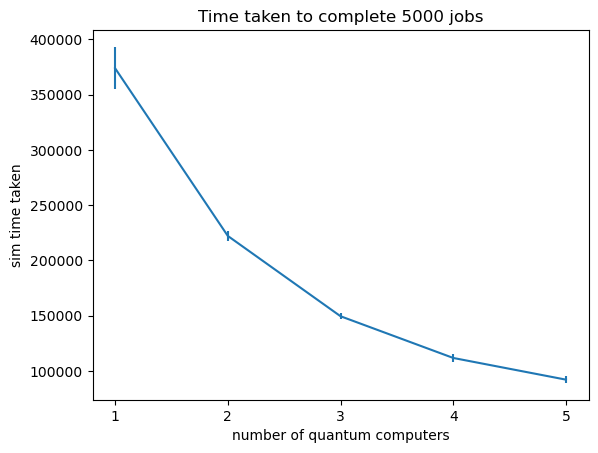

In [7]:
plt.errorbar(list(sim_time_taken.keys()), avg_sim_time_taken, std_sim_time_taken)
plt.xticks(range(1,6))
plt.xlabel('number of quantum computers')
plt.ylabel('sim time taken')
plt.title('Time taken to complete 5000 jobs')
plt.show()

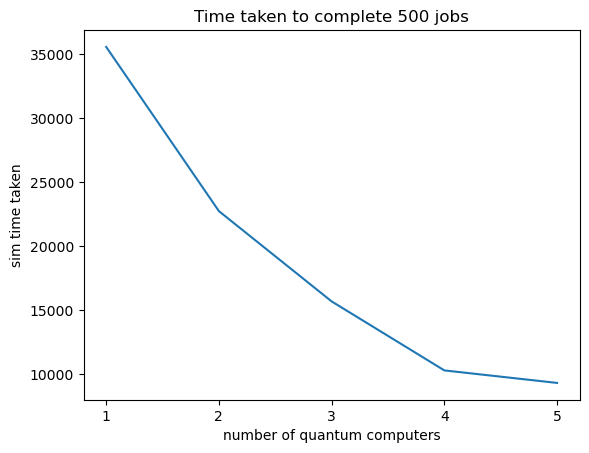

In [42]:
plt.errorbar(list(sim_time_taken.keys()), avg_sim_time_taken, std_sim_time_taken)
plt.xticks(range(1,6))
plt.xlabel('number of quantum computers')
plt.ylabel('sim time taken')
plt.title('Time taken to complete 50000 jobs - ')
plt.show()

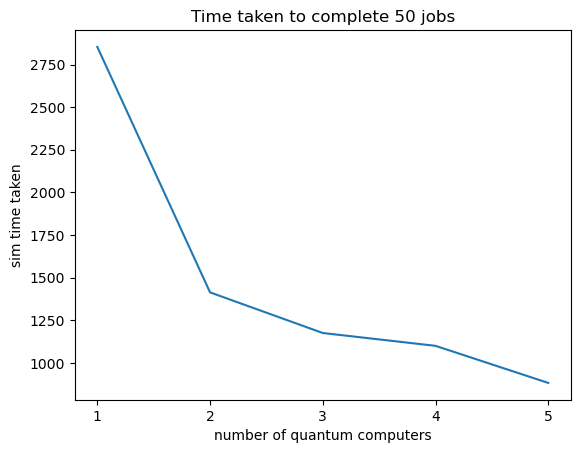

In [39]:
plt.plot(list(sim_time_taken.keys()), list(sim_time_taken.values()))
plt.xticks(range(1,6))
plt.xlabel('number of quantum computers')
plt.ylabel('sim time taken')
plt.title('Time taken to complete 50 jobs')
plt.show()

In [ ]:
plt.plot(list(sim_time_taken.keys()), list(sim_time_taken.values()))
plt.xticks(range(1,6))
plt.xlabel('number of quantum computers')
plt.ylabel('sim time taken')
plt.title('Time taken to complete 50 jobs')
plt.show()

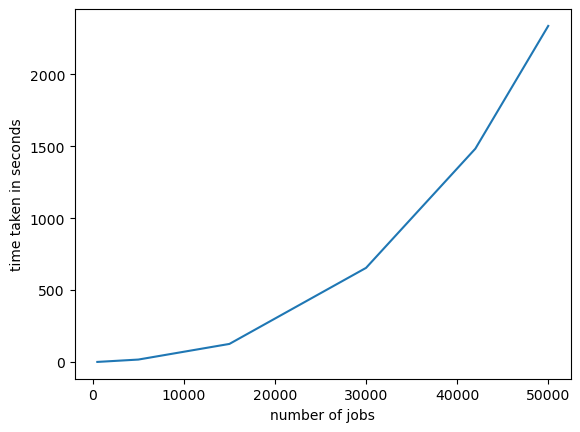

In [99]:
plt.plot([500, 5000, 15000, 30000, 42000, 50000], [0.68113, 17.06246, 125.75, 654.29, 1482.68367, 2335.85])
plt.xlabel('number of jobs')
plt.ylabel('time taken in seconds')
plt.title('')
plt.show()